<div><center><img src="http://fligoo.com/img/logos/logo-fligoo.png" width="200" style="float: center;"></center></div>
<div style="clear:both;"></div>

<h1 style="font-size: 35px;">Visualization Catalog</h1>

# Tutorial

This is a basic tutorial of how to use the [Visualization Catalog](https://github.com/nicotom/visualization_catalog) with a simple example with the titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic).

Many plots will be presented starting from simple barplots, heatmaps and diving into complex ones like ROC curve and joint plots. Every step is reproducible and linked to the documentation with more examples.

![](https://www.biography.com/.image/ar_16:9%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cg_faces:center%2Cq_auto:good%2Cw_768/MTI5MzY2NjIzMTA1NTkxOTM5/titanic-3jpg.jpg)

## Requisites
Import required libraries

In [1]:
# Avoid warnings in this tutorial
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [37]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from jupyterthemes import jtplot
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc

In [4]:
jtplot.style(figsize=(15, 6), grid=False)

In [5]:
# Auxiliar functions
def gif(url, width=480, height=480):
    return HTML(f'<img src="https://media.giphy.com/media/{url}/giphy.gif" width="{width}" height="{height}">')

## Load the dataset

In [6]:
# get titanic csv files as a DataFrame
# https://www.kaggle.com/c/titanic/data
training = pd.read_csv("data/train.csv")

In [7]:
training.head() # print first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show only the columns used for this tutorial

![](images/selected_variables.jpg)

## Sex
Let's talk about sex...


In [8]:
gif('MZ9nZGQn1nqBG', height=432)

And what I mean is a bar plot of Sex/Survival. Of course!

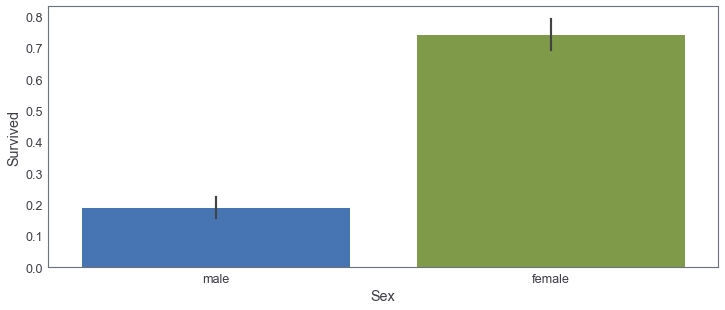

In [9]:
# Let's draw a bar plot of Sex/Survived
ax = sns.barplot(x="Sex", y="Survived", data=training)

Created by [this link](https://github.com/nicotom/visualization_catalog/blob/master/Ranking/bar.ipynb)

Female passengers had more survival rate than men.

## Money
Which class were the passengers?

In [10]:
gif('9HQRIttS5C4Za', height=256)

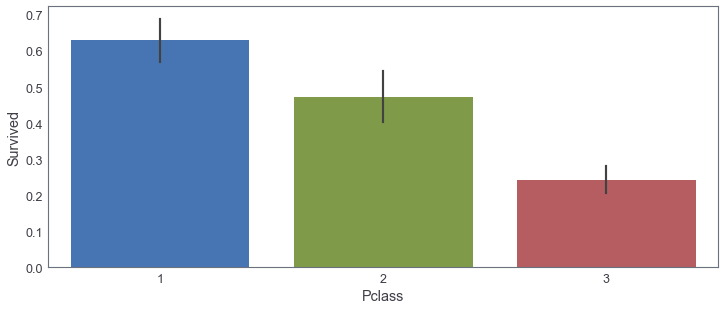

In [11]:
# Let's draw a bar plot of PClass/Survived
ax = sns.barplot(x="Pclass", y="Survived", data=training)

[Bar plots](https://github.com/nicotom/visualization_catalog/blob/master/Ranking/bar.ipynb)

The higher the class the higher survival rate.
```
1st class > 2nd class > 3rd class
```

Let's show the relationship between Class, Sex and whether it survived

In [12]:
tmp = pd.DataFrame(training.groupby(('Pclass', 'Sex')).Survived.mean()).unstack()
tmp.columns = tmp.columns.droplevel()
tmp

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


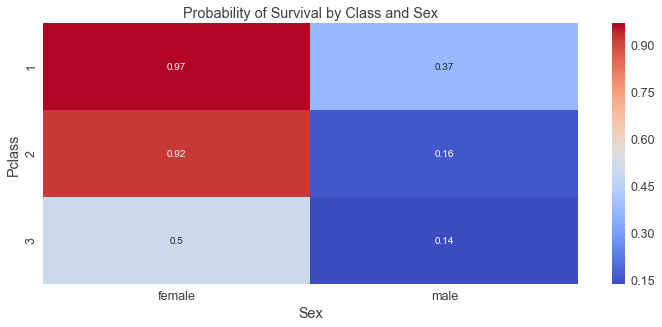

In [13]:
# Draw a heatmap
ax = sns.heatmap(tmp, cmap="coolwarm", annot=True, annot_kws={"size": 10})
_ = ax.set_title('Probability of Survival by Class and Sex')

[Heatmap](https://github.com/nicotom/visualization_catalog/blob/master/Correlation/heatmap.ipynb)

The women survived more than men regarless of the class.

Another representation with the same objective.

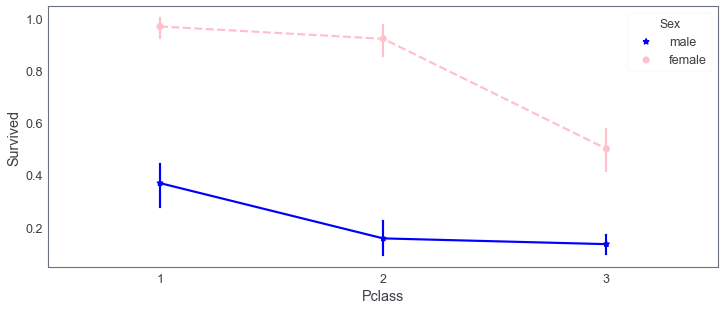

In [14]:
# Draw a pointplot
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=training,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]); 

[pointplot](https://github.com/nicotom/visualization_catalog/blob/master/Correlation/pointplot.ipynb)

## What about age?

In [15]:
gif('GrUhLU9q3nyRG', height=261)

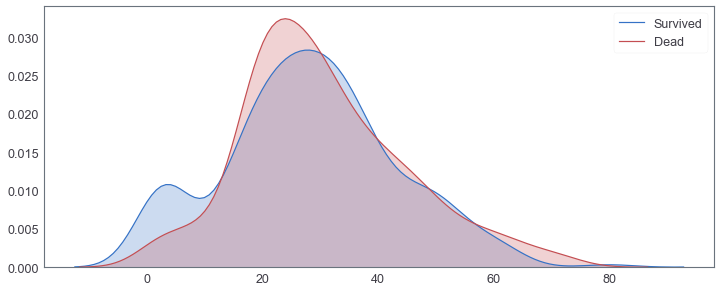

In [16]:
# Density plot
p1=sns.kdeplot(training[training.Survived == 1]['Age'], shade=True, color="b", label='Survived')
p2=sns.kdeplot(training[training.Survived == 0]['Age'], shade=True, color="r", label='Dead')

[Density](https://github.com/nicotom/visualization_catalog/blob/master/Distribution/density.ipynb)

There seems to be a group of children that survived more than the rest.

In [17]:
def show_response_rate(data, field, response, top_n=None, count_type='bar', title=None, column_name='Examples'):
    ds = data[data[field].notnull()].groupby(field)[response].agg(['count', 'sum'])
    ds['response_rate'] = ds['sum'] / ds['count']
    if top_n:
        ds = ds.sort_values(by='count', ascending=False).head(top_n).reset_index()
    else:
        ds = ds.reset_index()

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    if count_type == 'distplot':
        sns.distplot(data[data[field].notnull()][field], ax=ax, label=f'Distribution of {column_name}')
    else:
        ax.bar(ds.index, ds["count"], color="b", label=f'Distribution of {column_name}')
        ax.set_xticks(ds.index)
        ax.set_xticklabels(ds[field])

    ax2.plot(ds.index, ds["response_rate"], color='green', label='Response rate', lw=2, marker='o', markersize=10)
    ax.set_ylabel(f"Number of {column_name}")
    ax.set_xlabel(field)
    ax2.set_ylabel(response)
    ax2.set_ylim(0, ax2.get_ylim()[1])
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
    plts, labels = ax.get_legend_handles_labels()
    plts2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(plts + plts2, labels + labels2, loc='upper left', bbox_to_anchor=(1.1, 1))
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=0 if max(len(x.get_text()) for x in ax.get_xticklabels()) < 9 else 20, ha='right')
    fig.suptitle("{} rate by {}.".format(response, field if not isinstance(title, str) else title))
    return ds

In [18]:
variable = 'Age'
df_subset = training[[variable, 'Survived']]
df_subset[variable] = pd.cut(df_subset[variable], [0, 10, 20, 30, 40, 50, 60, 70, float('inf')], precision=0, right=False)
df_subset.head()

,Age,Survived
0,"[20.0, 30.0)",0
1,"[30.0, 40.0)",1
2,"[20.0, 30.0)",1
3,"[30.0, 40.0)",1
4,"[30.0, 40.0)",0


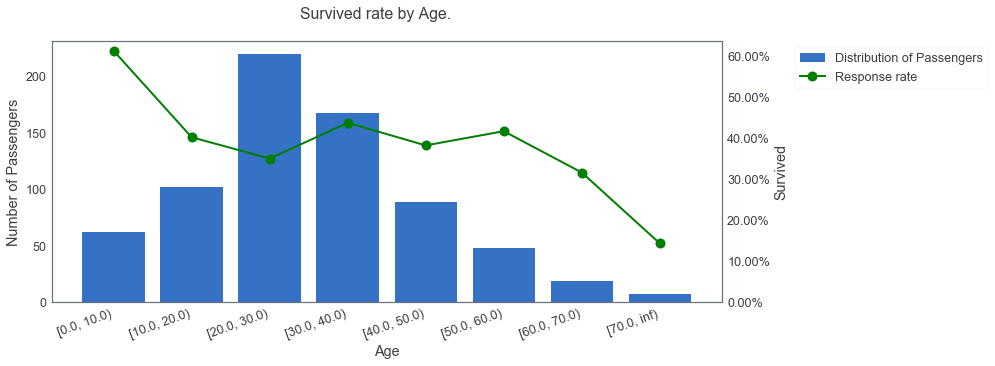

In [19]:
# Let's show a plot by the distribution of age and the survival rate
_ = show_response_rate(data=df_subset, field='Age', response='Survived', column_name='Passengers')

[Rresponse rate and distribution](https://github.com/nicotom/visualization_catalog/blob/master/Complex/response_rate_and_distribution.ipynb)

We can see that the majority of the passengers had between 20 and 40 years old. And 60% of the children survived, whereas 40% of middle age ones, and only 15% of the eldest.

## Feature Engineering
Feature creation, transformation and Data Cleansing

In [20]:
gif('1hBWtlec4aAb37ggn8', height=478)

In [21]:
train = training[['Sex', 'Pclass', 'Age', 'Survived']].dropna(subset=['Age'])
train['Pclass'] = train['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})
X = pd.concat([pd.get_dummies(train['Sex']), pd.get_dummies(train['Pclass']), train['Age']], axis=1)
X.rename(columns={'Age': 'age'}, inplace=True)
y = train['Survived']

In [22]:
pd.concat([X, y], axis=1).head()

,female,male,first,second,third,age,Survived
0,0,1,0,0,1,22.0,0
1,1,0,1,0,0,38.0,1
2,1,0,0,0,1,26.0,1
3,1,0,1,0,0,35.0,1
4,0,1,0,0,1,35.0,0


## Model Training
Let's train and compare two models to check their performance

In [23]:
gif('9EvzNG9HAVc64', height=270)

In [24]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Save metrics
fpr = dict()
tpr = dict()

#### Random Forest
Let's train a Random Forest as our first model

In [25]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
fpr['Random Forest'], tpr['Random Forest'], _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
print('Accuracy {:.2%}'.format(accuracy_score(y_test, rf_clf.predict(X_test))) )

Accuracy 78.32%


#### Logistic Regression
Let's train a Logistic Regression to compare the models

In [26]:
logreg_clf = LogisticRegression(random_state=42)
logreg_clf.fit(X_train, y_train)
fpr['Logistic Regression'], tpr['Logistic Regression'], _ = roc_curve(y_test, logreg_clf.predict_proba(X_test)[:,1])
print('Accuracy {:.2%}'.format(accuracy_score(y_test, logreg_clf.predict(X_test))) )

Accuracy 73.43%


Let's compare them now

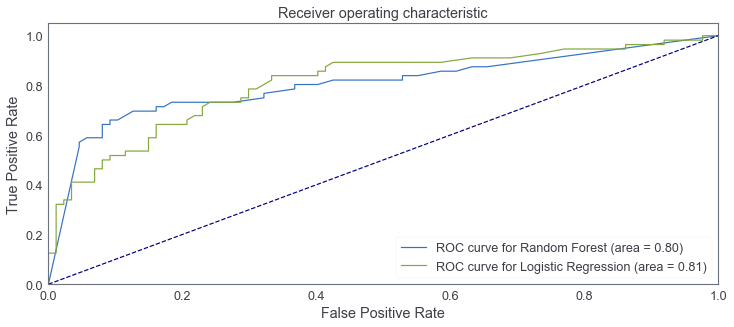

In [27]:
# Draw ROC curve
plt.figure()
for key in fpr.keys():
    plt.plot(fpr[key], tpr[key], label='ROC curve for %s (area = %0.2f)' % (key, auc(fpr[key], tpr[key])))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
_ = plt.legend(loc="lower right")

## Prediction
To give an end to this story...

Who will live?

In [28]:
gif('G4iTN6BzRaHyU', height=227)

In [29]:
def predict_survival(female=0, male=0, first=0, second=0, third=0, age=0, **kwargs):
    tmp = pd.DataFrame.from_dict({
        'female': [female], 'male': [male], 'first': [first], 'second': [second], 'third': [third], 'age': [age]
    })
    return gif('1xV8ipMQIaknaF0Rzp', height=325) if rf_clf.predict(tmp)[0] else gif('14vXAPPJPZRzsA', height=235)

Example 1: Mery, female, 30 years old, bought first class ticket.

**Will she survive?**

In [30]:
predict_survival(name='Mery', female=1, first=1, age=30)

**Yeah! She is alive!!!**

Example 2: Dani, male, 32 years old, bought third class ticket.

**Will he survive?**

In [31]:
predict_survival(name='Dani', male=1, third=1, age=32)

**Oops :(**

## Any volunteer?
What could possibly go wrong?

In [36]:
# predict_survival(name='Juan Perez', female=0, male=0, first=0, second=0, third=0, age=0)

## Any questions?

In [33]:
gif('vYApfgSMN27CM')

## Links
 - [Visualization Catalog](https://github.com/nicotom/visualization_catalog)
 - [Titanic Dataset](https://www.kaggle.com/c/titanic/data)
 - [Jupyter Slideshow](https://github.com/damianavila/RISE)
 - [Fligoo](https://fligoo.com/)